In [1]:
# dependencies 
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

%matplotlib inline



In [2]:
def load_data():
    data = pd.read_csv('data.txt')    
    x= data.as_matrix(columns=None)
    x_batch = x[:96 ,:1 ]
    print x_batch.shape
    y_batch = x[:96,1:]
    print y_batch.shape
    return x_batch,y_batch

In [16]:
def linear_regression():
    x = tf.placeholder(tf.float32,shape=(None,1),name='x')
    y = tf.placeholder(tf.float32,shape=(None,1),name='y')
    with tf.variable_scope('lreg') as scope:
        #w = tf.Variable(np.random.normal(),name = 'w')
        w = tf.Variable(np.zeros((2,), dtype=np.float32),name = 'w')
        b = tf.Variable(np.ones((2,), dtype=np.float32),name = 'bias')
        y_pred = tf.multiply(w,x) + b
        loss = tf.reduce_mean(tf.square(y_pred-y))
        #loss = tf.nn.l2_loss(y_pred-y)
    
    return x,y,y_pred,loss,w

In [19]:
def run():
    x_batch,y_batch = load_data()
    x,y,y_pred,loss,w = linear_regression()
    optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(loss)
    
    
    init = tf.global_variables_initializer()
    sess = tf.Session()
    sess.run(init)
    
    feed_dict = {x : x_batch , y : y_batch}
    for i in range(1500):
        loss_val,_  = sess.run([loss,optimizer],feed_dict)
        if(i%150==0) :
            print('loss: ',loss_val.mean())
        
    y_pred_batch = sess.run(y_pred , {x : x_batch})
    plt.scatter(x_batch,y_batch)
    plt.plot(x_batch,y_pred_batch,color = 'g')
    
    

(96, 1)
(96, 1)
('loss: ', 54.022625)
('loss: ', 11.563077)
('loss: ', 10.495384)
('loss: ', 9.8735018)
('loss: ', 9.511281)
('loss: ', 9.3003035)
('loss: ', 9.1774216)
('loss: ', 9.1058455)
('loss: ', 9.0641565)
('loss: ', 9.0398741)


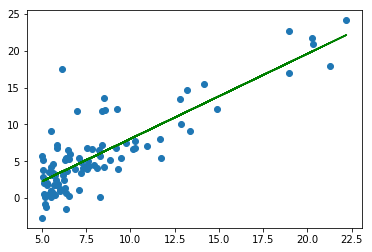

In [20]:
if __name__ == '__main__':
    run()
